In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans




para generar los mismos resultados!!!!(just for learning)

In [ ]:
np.random.seed(1)

## Data

In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


<Figure size 432x288 with 0 Axes>

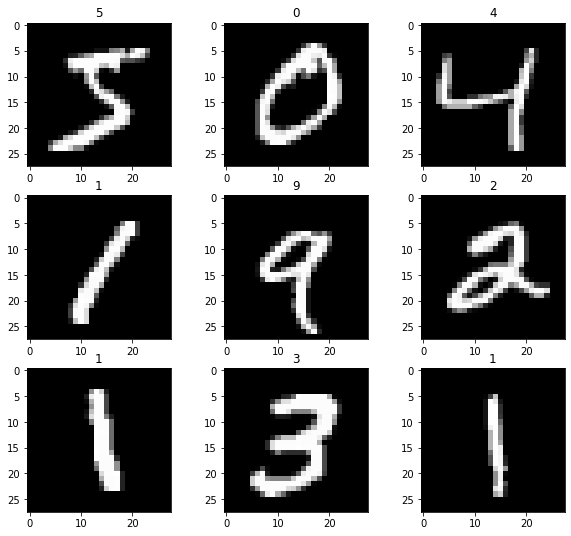

In [ ]:
plt.gray() # B/W 
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train[i])
 plt.title(y_train[i])



## preprocessing


In [ ]:
print('max:',x_train.max())
print('min:',x_train.min())
delta=x_train.max()-x_train.min()

max: 255
min: 0


In [ ]:
# Data Normalization
# Conversion to float
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
# Normalization
x_train = x_train/float(delta)
x_test = x_test/float(delta)

Dado que kmeans asume un vector y no una matriz (imagen), debemos aplanar el vector

In [ ]:
# Reshaping input data
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


## Model


In [ ]:
total_clusters = len(np.unique(y_test))
total_clusters

10

In [ ]:


kmeans = MiniBatchKMeans(n_clusters = total_clusters)
kmeans.fit(X_train)

MiniBatchKMeans(n_clusters=10)

In [ ]:
kmeans.labels_

array([8, 3, 6, ..., 0, 9, 8], dtype=int32)

Funciono??

<Figure size 432x288 with 0 Axes>

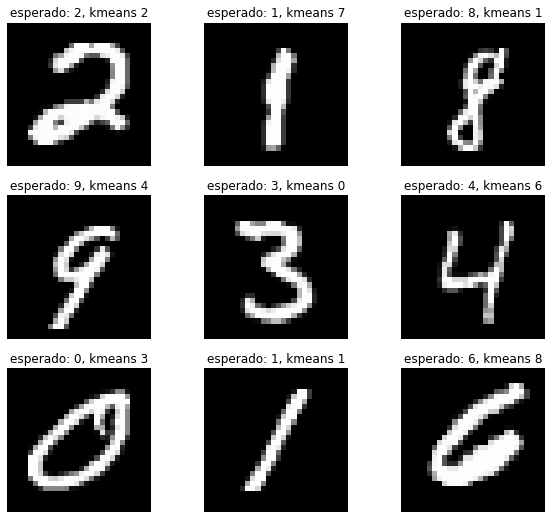

In [ ]:

plt.gray() # B/W 
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(9):
 plt.subplot(3,3,i+1)
 n = np.random.randint(len(kmeans.labels_))
 plt.imshow(x_train[n].reshape(28,28))
 plt.title(f'esperado: {y_train[n]}, kmeans {kmeans.labels_[n]}')
 plt.axis('off')

## Validate Model

El rendimiento del modelo se mide mediante las siguientes 3 métricas: inercia, puntuación de homogeneidad y la complitud.

- La **inercia** es una medida de la coherencia interna de los clústeres. Es inversamente proporcional a la suma de los cuadrados de las distancias entre los puntos de datos y el centroide de su grupo respectivo. Cuanto mayor sea el número de grupos, menor es la puntuación de inercia.

- En la agrupación, un punto de datos puede pertenecer a más de un grupo con algún valor de probabilidad. Los puntos de datos en el límite de los conglomerados pueden pertenecer a más de un conglomerado. La **homogeneidad** es una medida de los puntos de datos de un grupo particular que pertenece a una sola clase.

- Métrica de **complitud** de un etiquetado de clúster dada una verdad básica.Un resultado de agrupación satisface la cumplitud si todos los puntos de datos que son miembros de una clase dada son elementos del mismo grupo.

-     Distorsión: Se calcula como el promedio de las distancias al cuadrado de los centros de cúmulo de los respectivos cúmulos. Normalmente, se utiliza la métrica de distancia euclidiana.


Mayor informacion (user guide scikit-learn)[https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules]

In [ ]:
from sklearn import metrics
def calculate_metrics(model,output):
 print(f'Number of clusters is {model.n_clusters}')
 print(f'Inertia : {model.inertia_}')
 print(f'Homogeneity :       {metrics.homogeneity_score(output,model.labels_)}')
 print(f'Completeness:       {metrics.completeness_score(output,model.labels_)}') 

In [ ]:
calculate_metrics(kmeans,y_train)

Number of clusters is 10
Inertia : 2373572.25
Homogeneity :       0.47930074691149804
Completeness:       0.48600093943292205


Intentemos cambiando el numero de clusters para ver si cambian estos indicadores


In [ ]:
cluster_number = [10,16,36,64,144,256]
for i in cluster_number:
  total_clusters = len(np.unique(y_test))# Initialize the K-Means model
  kmeans = MiniBatchKMeans(n_clusters = i)
  kmeans.fit(X_train)# Calculating the metrics
  calculate_metrics(kmeans,y_train)
  print()

Number of clusters is 10
Inertia : 2379670.0
Homogeneity :       0.4902914456205158
Completeness:       0.4971248313510841

Number of clusters is 16
Inertia : 2213666.5
Homogeneity :       0.547296599182386
Completeness:       0.4596673711757995

Number of clusters is 36
Inertia : 1959125.375
Homogeneity :       0.6760630883761783
Completeness:       0.4388031291039443

Number of clusters is 64
Inertia : 1805692.0
Homogeneity :       0.7481535587598073
Completeness:       0.4172209890228305

Number of clusters is 144
Inertia : 1624372.25
Homogeneity :       0.8067288929036552
Completeness:       0.37681151177155636

Number of clusters is 256
Inertia : 1507884.0
Homogeneity :       0.8396733293449826
Completeness:       0.35247714802486296



### Número de grupos

Determinar el número óptimo de clústeres en un conjunto de datos es una cuestión fundamental en la agrupación de clústeres de particiones, como la agrupación en clústeres de k-means, que requiere que el usuario especifique el número de clústeres k que se generarán.

Desafortunadamente, no hay una respuesta definitiva a esta pregunta. El número óptimo de clústeres es de alguna manera subjetivo y depende del método utilizado para medir las similitudes y los parámetros utilizados para la partición.

**Método del codo** Recordemos que, la idea básica detrás de los métodos de partición, como el agrupamiento de k-medias, es definir clústeres de tal manera que se minimice la variación total dentro del clúster [o la suma total dentro del clúster de cuadrados (WSS)]. El WSS total mide la compacidad del clustering y queremos que sea lo más pequeño posible. El método Elbow analiza el WSS total en función del número de clústeres: se debe elegir un número de clústeres para que agregar otro clúster no mejore mucho el WSS total.

Además de los métodos estadísticos de codo, silueta y brecha, hay más de treinta otros índices y métodos que se han publicado para identificar el número óptimo de grupos.
mas información (User Guide)[https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation]

In [ ]:
from scipy.spatial.distance import cdist
#Nc = range(10, 100,5)

Nc = [10,16,36,64,144,256]
distortions = []
inertias = []
for i in Nc:
  kmeans = MiniBatchKMeans(n_clusters = i)
  kmeans.fit(X_train)
  inertias.append(kmeans.inertia_)
  distortions.append(sum(np.min(cdist(X_train, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X_train.shape[0])



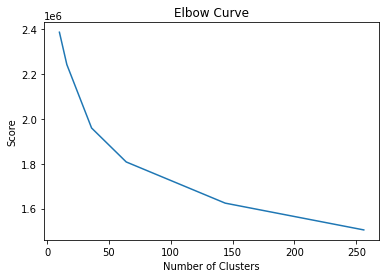

In [ ]:

plt.plot(Nc,inertias,label='Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

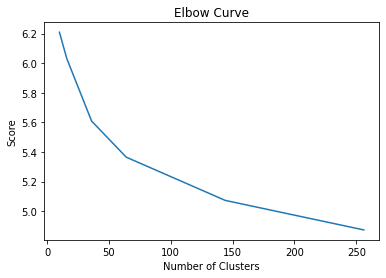

In [ ]:

plt.plot(Nc,distortions,label='Distortion')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Para este ejercicio a mayor mejor, normalmente debe haber un punto de aplanamiento de la curva.  
Digamos que escogemos 20 para nuestro caso, la pregunta es como logramos las 10 requeridas? Manualmente, pues el algoritmo no recibe la salida.

# Revision manual de los cluster

Vamos a visualizar las imagenes de los centroides y haremos un agrupamiento manual

In [ ]:
kmeans = MiniBatchKMeans(n_clusters = 20)
kmeans.fit(X_train)

MiniBatchKMeans(n_clusters=20)

La moda nos puede decir del grupo cual es la mejor opción

In [ ]:
from scipy import stats

m = stats.mode(kmeans.labels_[kmeans.labels_==1])
print(m)

ModeResult(mode=array([1], dtype=int32), count=array([4985]))


In [ ]:
print(m.mode[0])
print(m.count[0]/len(kmeans.labels_[kmeans.labels_==1]))

1
1.0


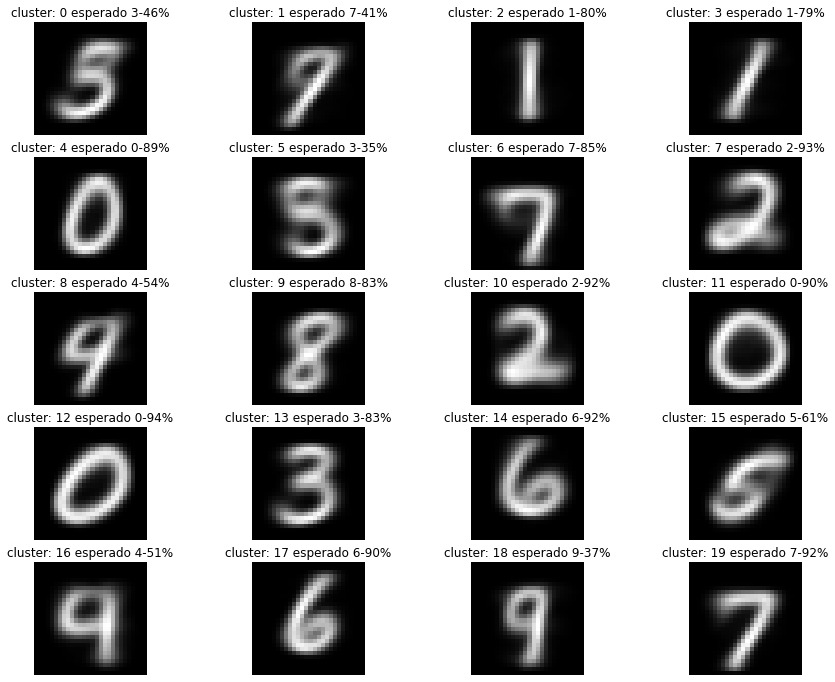

In [ ]:
from scipy import stats

plt.figure(figsize = (15,12)) # Adjusting figure size

for i in range(20):
 plt.subplot(5,4,i+1)
 indices = np.where(kmeans.labels_==i) # 
 m = stats.mode(y_train[indices[0]])
 predict= m.mode[0]
 predict_prob=int(100*m.count[0]/indices[0].shape)
 #n=indices[0][np.random.randint(indices[0].shape)]
 plt.imshow(kmeans.cluster_centers_[i].reshape(28,28))
 plt.axis('off')
 plt.title(f'cluster: {i} esperado {predict}-{predict_prob}%')

De aqui en adelante seria un proceso iterativo manualmente si lo que quiere es hacer es una "clasificación". Sin embargo normalmente ese no es el objetivo de segmentar pues asumimos que no se conoce la salida.  El objeto es identicar caracteristicas comunes en cada segmento de datos y como un segmento se diferencia de los otros. por ejemplo si vemos las entradas (imagenes clasificadas en este segmento).

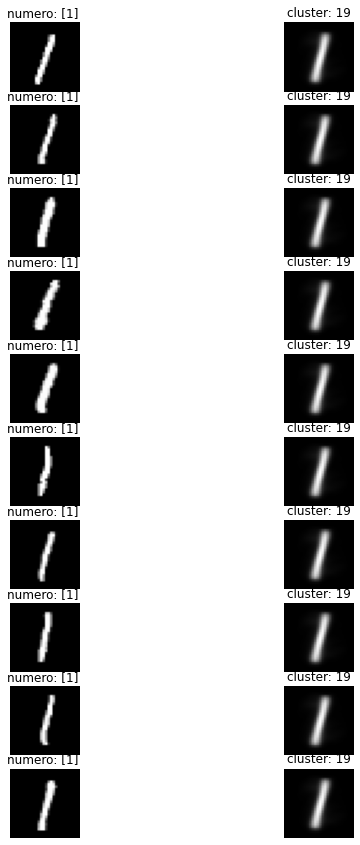

In [ ]:
from scipy import stats

plt.figure(figsize = (9,15)) # Adjusting figure size

i=19 # segmento deseado
indices = np.where(kmeans.labels_==i)
for j in range(0,20,2):
  plt.subplot(10,2,j+1)
  n=indices[0][np.random.randint(indices[0].shape)]
  plt.imshow(X_train[n].reshape(28,28))
  plt.axis('off')
  plt.title(f'numero: {y_train[n]} ')

  plt.subplot(10,2,j+2)
  plt.imshow(kmeans.cluster_centers_[i].reshape(28,28))
  plt.axis('off')
  plt.title(f'cluster: {i}')

In [ ]:
import pickle

pickle.dump( kmeans, open( "modelo_final.p", "wb" ) )


## Predicción

El objetivo en la etapa de predicciòn no es tanto encontrar cual el numero de salida , sino con cuales de los datos de entrenamiento tiene mayor "similitud". 
Recordemos que en esta etap no se usan los datos de entrenamiento sino nuevos datos, saber que tan bueno es nuestro modelo es medir que tan homogeneo son los datos de un segmento o grupo y que tan heterogeneo es un grupo con respecto a los demas.

A continuaciòn mostramos ejemplos con los datos de test y luego realizaremos una prueba con gradio para tener nuevos datos. Para recordar que en la fase de predicción **no** se requiere la data de entrenamiento utilizaremos pickle para hacer persistencia del modelo seleccionado en la etapa anterior.

In [ ]:

modelo_implementacion = pickle.load( open( "modelo_final.p", "rb" ) )

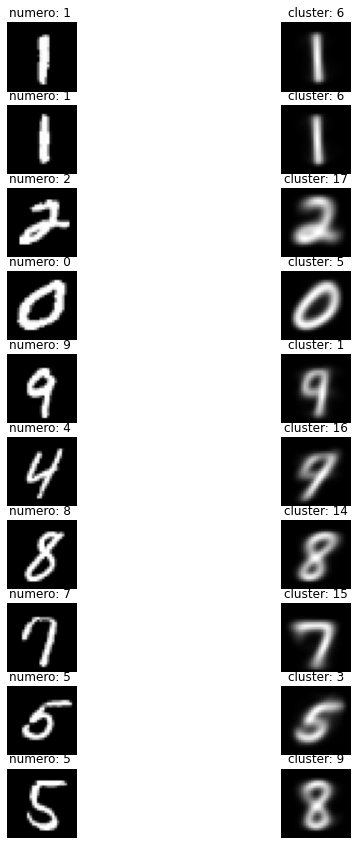

In [ ]:
from scipy import stats

plt.figure(figsize = (9,15)) # Adjusting figure size

i=19 # segmento deseado
indices = np.where(kmeans.labels_==i)
for j in range(0,20,2):
  n=np.random.randint(X_test.shape[0]) # un ejemplo al azar
  #predecir
  cluster= modelo_implementacion.predict(X_test[n].reshape(1,-1))
  cluster=cluster[0]
  plt.subplot(10,2,j+1)
  plt.imshow(X_test[n].reshape(28,28))
  plt.axis('off')
  plt.title(f'numero: {y_test[n]} ')
  plt.subplot(10,2,j+2)
  plt.imshow(modelo_implementacion.cluster_centers_[cluster].reshape(28,28))
  plt.axis('off')
  plt.title(f'cluster: {cluster}')

Ahora con datos reales

In [ ]:
!pip install -q gradio

     |████████████████████████████████| 2.9 MB 5.5 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 1.1 MB 40.1 MB/s 
     |████████████████████████████████| 212 kB 43.9 MB/s 
     |████████████████████████████████| 84 kB 2.9 MB/s 
     |████████████████████████████████| 2.0 MB 33.6 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
     |████████████████████████████████| 253 kB 55.4 MB/s 
     |████████████████████████████████| 271 kB 59.4 MB/s 
     |████████████████████████████████| 144 kB 38.3 MB/s 
     |████████████████████████████████| 94 kB 2.4 MB/s 
     |████████████████████████████████| 58 kB 4.3 MB/s 
     |████████████████████████████████| 10.9 MB 40.7 MB/s 
     |████████████████████████████████| 79 kB 6.2 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
     |████████████████████████████████| 62 kB 861 kB/s 
     |████████████████████████████████| 4.0 MB 34.0 MB/s 
     |████████████████████████

In [ ]:
import gradio as gr


from skimage.color import gray2rgb


def recognize_digit(img): 
  # resize image to has the same input of trained model  
    image=img.astype('float32').reshape(-1)/255
    
    cluster= modelo_implementacion.predict(image.reshape(1,-1))[0]
    print(cluster)
    #salida=image.reshape(28,28)*255
    salida=modelo_implementacion.cluster_centers_[cluster].reshape(28,28)*255
    salida=gray2rgb(salida.astype('uint8'))
    return salida

#wish=np.random.randint(testX.shape[0])
#stacked_img=testX[wish].reshape(28,28,1)
#print(recognize_digit(stacked_img),testY[wish])

im = gr.inputs.Image(shape=(28, 28), image_mode='L',  invert_colors=True,source="canvas", type="numpy")

gr.Interface(fn=recognize_digit, inputs=im, outputs=gr.outputs.Image(type="numpy", label=None)).launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://49003.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


3
3
3
3
1
1
